In [3]:
from preamble import *
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

X.shape: (26, 2)


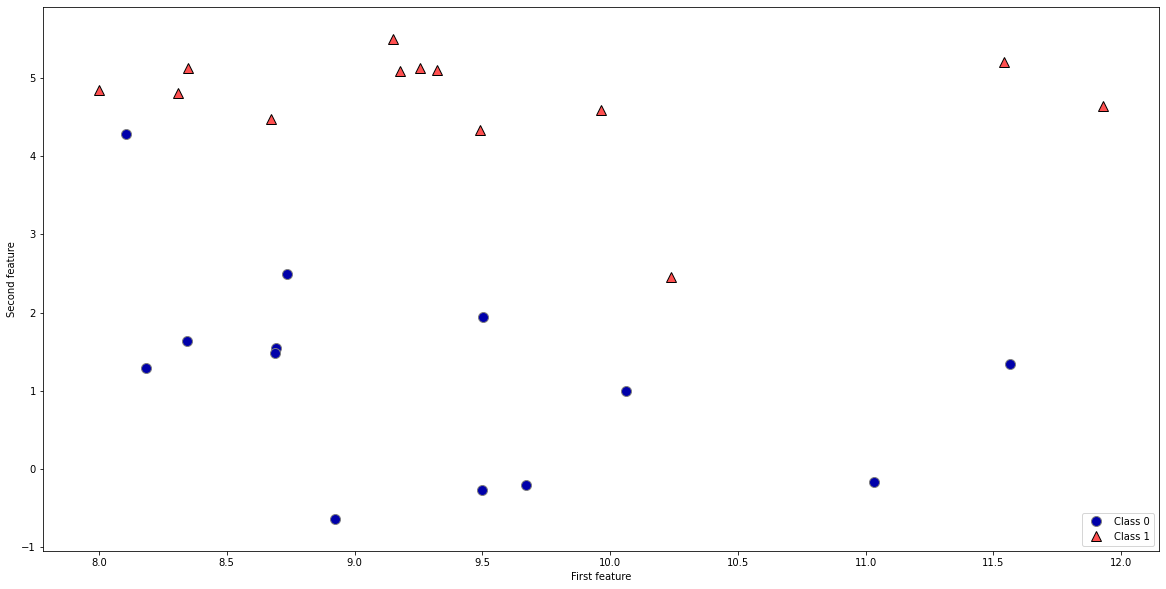

In [4]:
X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

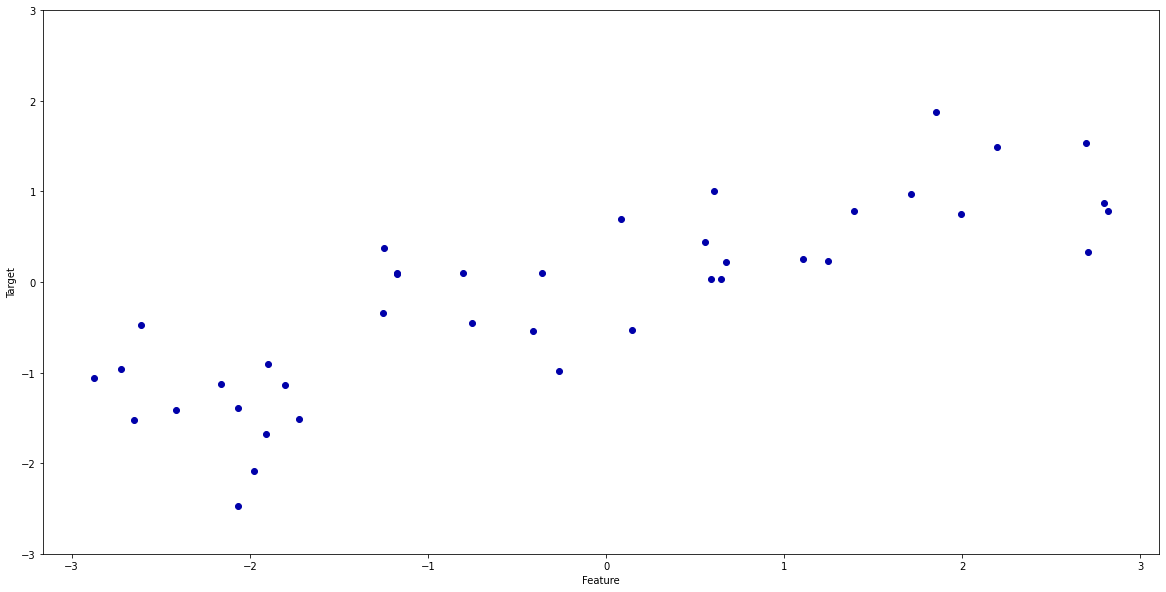

In [5]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [6]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
print(cancer.data.shape)

(569, 30)


In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
print(cancer.data.shape)

(569, 30)


In [10]:
print({n: v for n,v in zip(cancer.target_names,np.bincount(cancer.target))})

{'malignant': 212, 'benign': 357}


In [11]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.data.shape)

(506, 13)


In [12]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
X,y=mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


## 2.3.2 k-NN

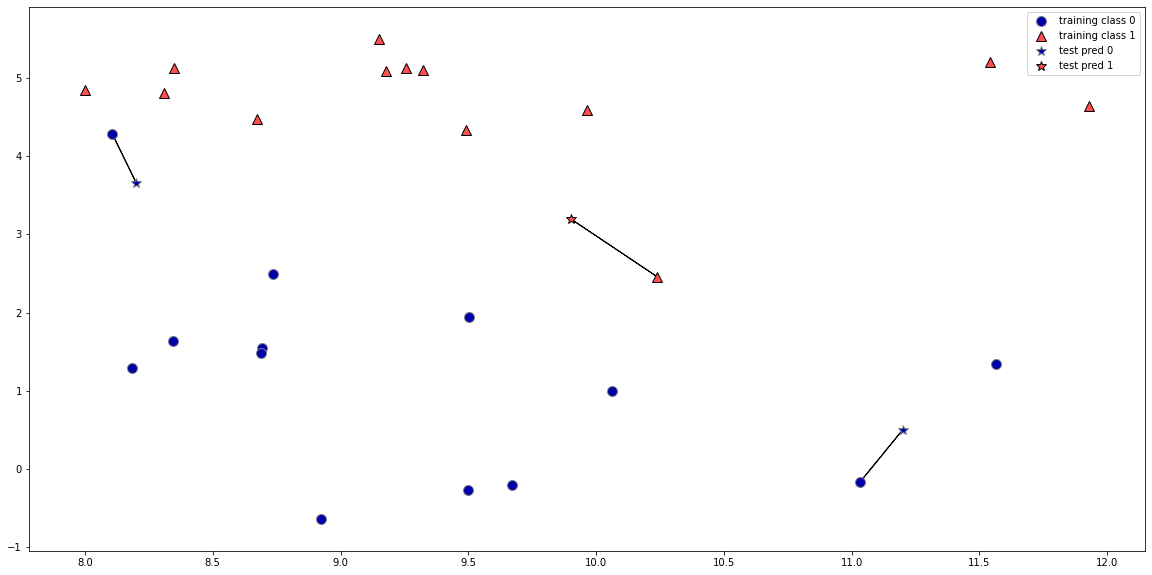

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [15]:
from sklearn.model_selection import train_test_split
import mglearn
X,y=mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [17]:
clf.fit(X_train,y_train)
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [18]:
clf.score(X_test,y_test)

0.8571428571428571

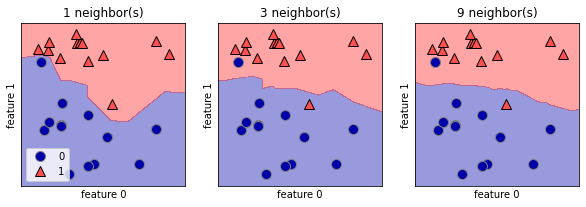

In [19]:
fig,axes=plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

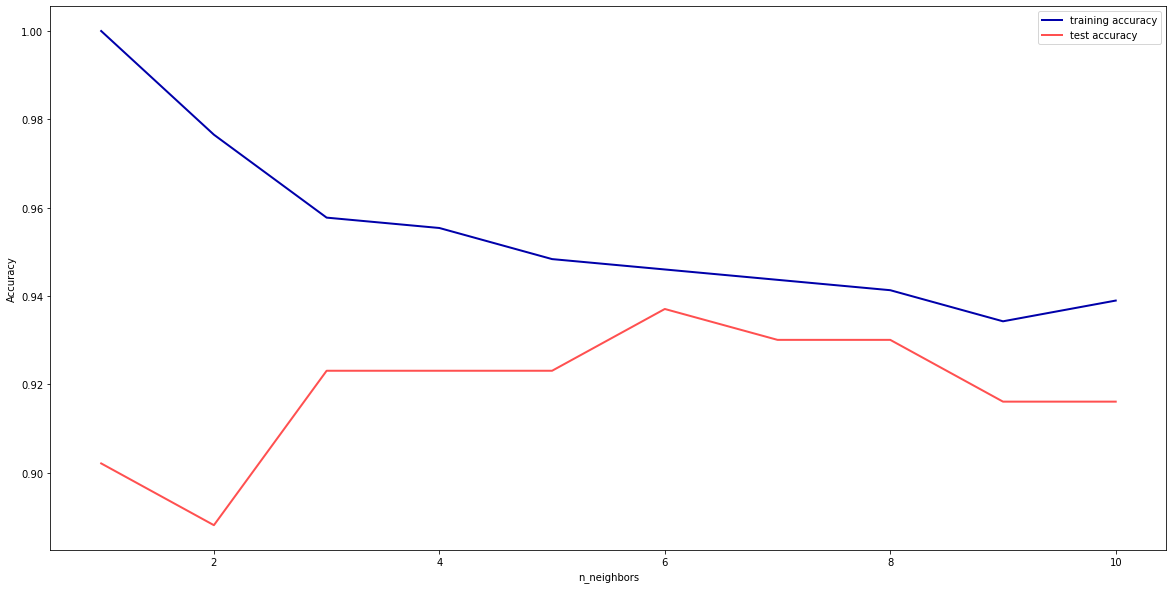

In [25]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

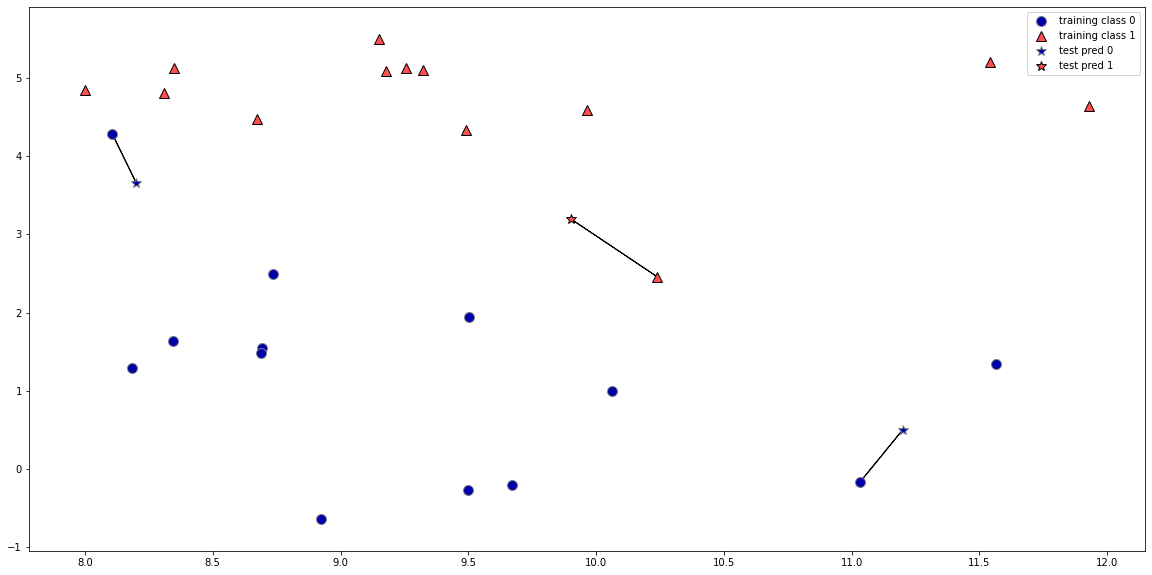

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

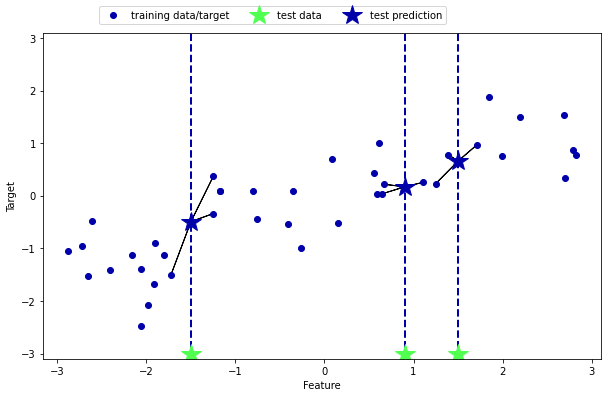

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [28]:
from sklearn.neighbors import KNeighborsRegressor
X,y=mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [29]:
reg.predict(X_test)

array([-0.054,  0.357,  1.137, -1.894, -1.139, -1.631,  0.357,  0.912,
       -0.447, -1.139])

In [30]:
reg.score(X_test,y_test)

0.8344172446249605